In [15]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# result = Sampler("ibmq_qasm_simulator").run(circuits).result()

from qiskit import *
from qiskit.providers.ibmq import least_busy
from qiskit.tools.jupyter import *
from qiskit.visualization import *
%matplotlib inline

# Importing standard Qiskit libraries
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# result = Sampler("ibmq_qasm_simulator").run(circuits).result()

import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, execute, Aer, IBMQ
from qiskit.providers.aer import QasmSimulator
from qiskit.providers.aer.noise import NoiseModel
import matplotlib.pyplot as plt

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()


/tmp/ipykernel_61/1427939008.py:47: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  provider = IBMQ.load_account()


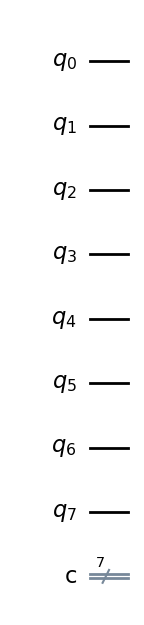

In [16]:
circuit = QuantumCircuit(7+1,7)
circuit.draw("mpl")

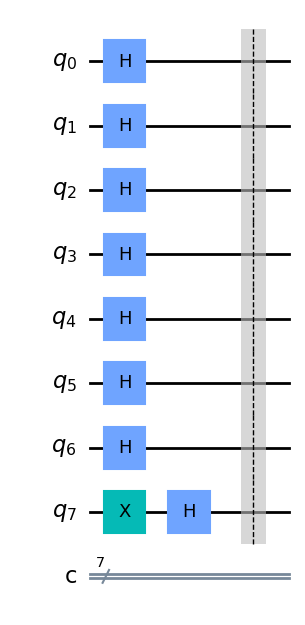

In [17]:
circuit.h([0,1,2,3,4,5,6])
circuit.x(7)
circuit.h(7)

circuit.barrier()
circuit.draw("mpl")

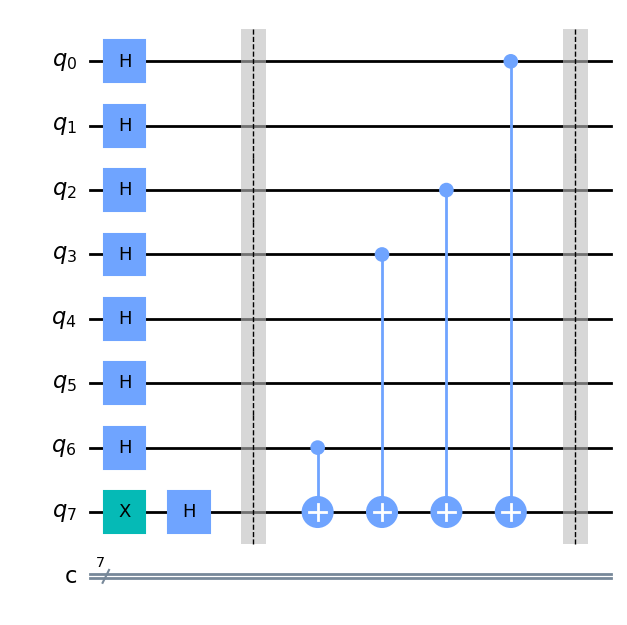

In [18]:
circuit.cx(6,7)
circuit.cx(3,7)
circuit.cx(2,7)
circuit.cx(0,7)

circuit.barrier()
circuit.draw("mpl")

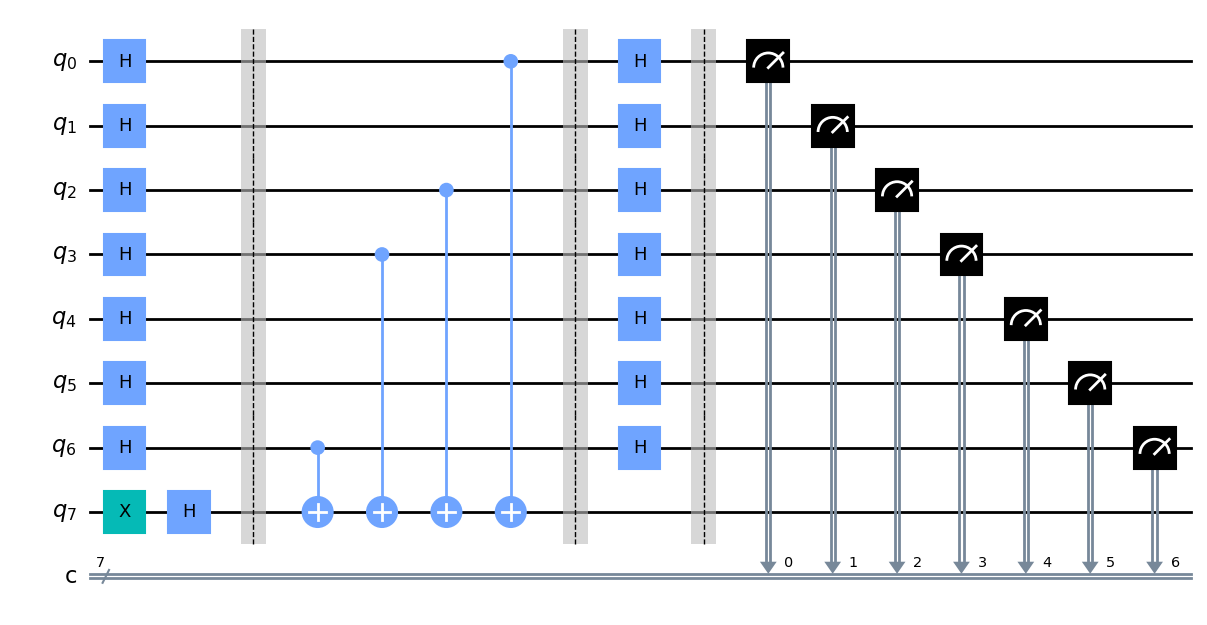

In [19]:
circuit.h([0,1,2,3,4,5,6])

circuit.barrier()

circuit.measure([0,1,2,3,4,5,6],[0,1,2,3,4,5,6])

circuit.draw("mpl")

{'1001101': 1}


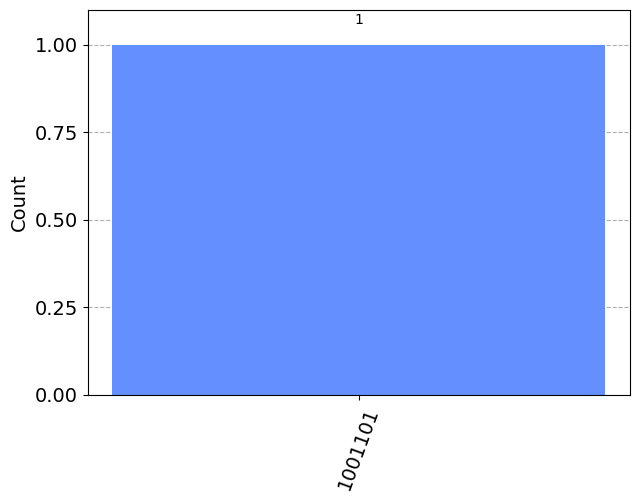

In [20]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1).result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

In [ ]:
secret_number = input("Input a Binary String of your choice ")  

Input a Binary String of your choice  1010


In [22]:
bv_circ = QuantumCircuit(len(secret_number)+1,len(secret_number))

bv_circ.h(range(len(secret_number)))
bv_circ.x(len(secret_number))
bv_circ.h(len(secret_number))

bv_circ.barrier()

# bv_circ.draw("mpl")

In [23]:
for digit, query in enumerate(reversed(secret_number)):
    if query == "1":
        bv_circ.cx(digit, len(secret_number))
              
bv_circ.barrier()

# bv_circ.draw("mpl")

In [24]:
bv_circ.h(range(len(secret_number)))

bv_circ.barrier()

bv_circ.measure(range(len(secret_number)),range(len(secret_number)))

# bv_circ.draw("mpl")

{'1010': 1}


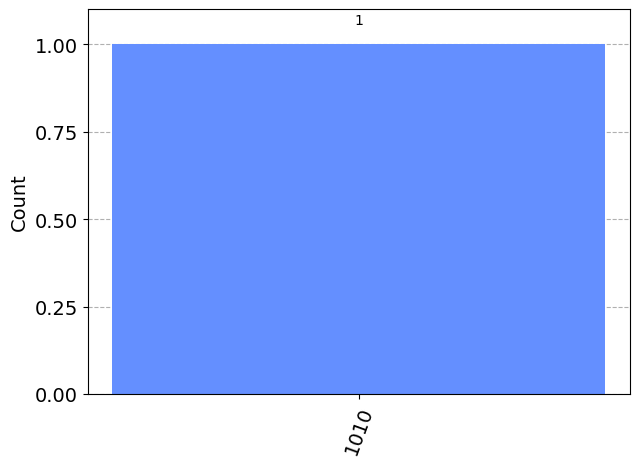

In [25]:
simulator = Aer.get_backend("qasm_simulator")
result = execute(bv_circ, backend = simulator, shots = 1).result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

In [26]:
from qiskit.providers.ibmq import least_busy
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 and
not x.configuration().simulator and x.status().operational==True)) # Find the least busy QC

print("least busy backend: ", backend)

least busy backend:  ibmq_quito


In [ ]:
exp = execute(bv_circ, backend, shots = 1024)
result_exp = exp.result()
counts_exp = result_exp.get_counts()
plot_histogram([counts_exp,counts])